In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import va_model as v

In [23]:
db = 'mdeland'
df, feature_columns, target_column = v.generate_features(db)

In [24]:
print(df.shape)
df.head()

(99, 15)


,state,year,election_id,district_id,district_name,votes_r,percentage_votes_r,dollars_r,votes_d,percentage_votes_d,dollars_d,incumbents_d,incumbents_r,dem_won,total_votes
1,VA,2015,368,1325,25,12103.0,66.28,231392.0,6158.0,33.72,67898.0,0.0,9.0,False,18261.0
2,VA,2015,368,1312,12,9245.0,58.39,290633.0,6587.0,41.61,99066.0,0.0,2.0,False,15832.0
4,VA,2015,368,1400,100,8657.0,57.96,48355.0,6278.0,42.04,72171.0,0.0,0.0,False,14935.0
5,VA,2015,368,1386,86,6390.0,42.04,1272272.0,8283.0,54.50,693914.0,0.0,0.0,True,14673.0
15,VA,2015,368,1342,42,10837.0,63.44,333461.0,6245.0,36.56,50555.0,0.0,9.0,False,17082.0


In [25]:
df.describe()

,year,election_id,district_id,votes_r,percentage_votes_r,dollars_r,votes_d,percentage_votes_d,dollars_d,incumbents_d,incumbents_r,total_votes
count,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000
mean,2013.040404,357.343434,1344.929293,10205.989899,54.304444,3.420089e+05,8241.636364,44.581414,2.163664e+05,0.585859,2.151515,18447.626263
std,1.511312,7.194331,29.460195,3467.337382,11.409647,3.046366e+05,2711.285622,11.083732,2.406915e+05,1.545303,2.854869,4580.331969
min,2011.000000,351.000000,1302.000000,2468.000000,11.890000,1.520000e+03,3865.000000,21.430000,2.532000e+03,0.000000,0.000000,8483.000000
25%,2011.000000,351.000000,1319.500000,7851.500000,50.330000,1.411170e+05,6186.000000,37.610000,6.557750e+04,0.000000,0.000000,15158.000000
50%,2013.000000,356.000000,1337.000000,10410.000000,56.870000,2.413610e+05,7769.000000,42.440000,1.396560e+05,0.000000,1.000000,18330.000000
75%,2015.000000,368.000000,1367.500000,12878.000000,60.905000,4.335155e+05,9648.000000,49.375000,2.532850e+05,0.000000,3.000000,21917.500000
max,2015.000000,368.000000,1400.000000,19839.000000,78.310000,1.390790e+06,18219.000000,87.790000,1.419758e+06,7.000000,9.000000,29502.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a8eb9e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10aa236a0>], dtype=object)

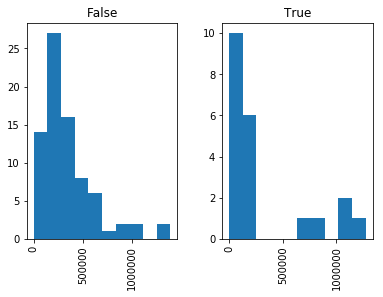

In [42]:
df[['dollars_r', 'dem_won']].hist(column='dollars_r', by='dem_won')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10aabba20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ab8a828>], dtype=object)

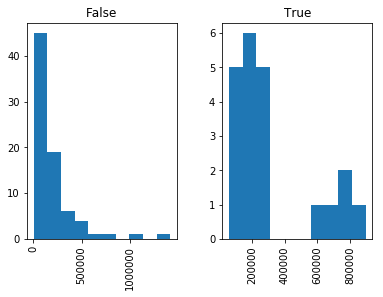

In [43]:
df[['dollars_d', 'dem_won']].hist(column='dollars_d', by='dem_won')

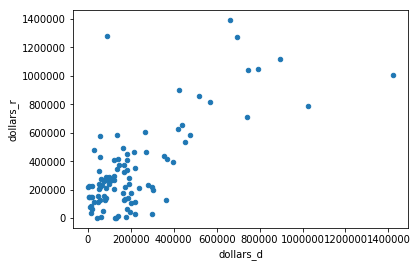

In [49]:
df.plot(kind='scatter', x='dollars_d', y='dollars_r')

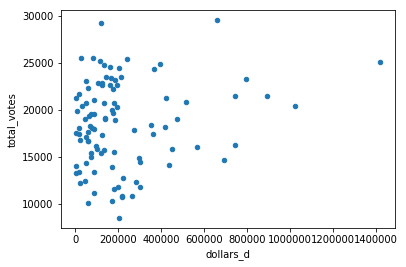

In [50]:
df.plot(kind='scatter', x='dollars_d', y='total_votes')

In [28]:
df['yearM2'] = df['year'] - 2

In [29]:
df_x = df.merge(df, how='inner', left_on=['district_id', 'yearM2'], right_on=['district_id', 'year'], suffixes=('', '_prior1'))

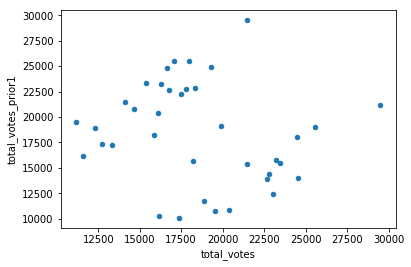

In [52]:
df_x.plot(kind='scatter', x='total_votes', y='total_votes_prior1')

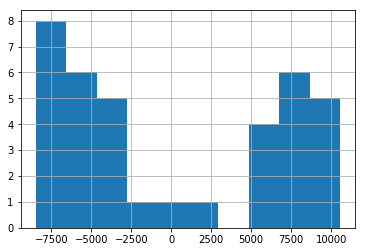

In [53]:
(df_x['total_votes'] - df_x['total_votes_prior1']).hist()

In [33]:
print(df_x.shape)
print(df_x.columns)
df_x.head()

(37, 31)
Index(['state', 'year', 'election_id', 'district_id', 'district_name',
       'votes_r', 'percentage_votes_r', 'dollars_r', 'votes_d',
       'percentage_votes_d', 'dollars_d', 'incumbents_d', 'incumbents_r',
       'dem_won', 'total_votes', 'yearM2', 'state_prior1', 'year_prior1',
       'election_id_prior1', 'district_name_prior1', 'votes_r_prior1',
       'percentage_votes_r_prior1', 'dollars_r_prior1', 'votes_d_prior1',
       'percentage_votes_d_prior1', 'dollars_d_prior1', 'incumbents_d_prior1',
       'incumbents_r_prior1', 'dem_won_prior1', 'total_votes_prior1',
       'yearM2_prior1'],
      dtype='object')


,state,year,election_id,district_id,district_name,votes_r,percentage_votes_r,dollars_r,votes_d,percentage_votes_d,...,percentage_votes_r_prior1,dollars_r_prior1,votes_d_prior1,percentage_votes_d_prior1,dollars_d_prior1,incumbents_d_prior1,incumbents_r_prior1,dem_won_prior1,total_votes_prior1,yearM2_prior1
0,VA,2015,368,1312,12,9245.0,58.39,290633.0,6587.0,41.61,...,52.31,624145.0,8650.0,47.42,419091.0,0.0,1.0,False,18191.0,2011
1,VA,2015,368,1386,86,6390.0,42.04,1272272.0,8283.0,54.50,...,50.08,860985.0,10378.0,49.92,517269.0,0.0,6.0,False,20788.0,2011
2,VA,2015,368,1342,42,10837.0,63.44,333461.0,6245.0,36.56,...,59.83,476687.0,10247.0,40.06,28541.0,0.0,8.0,False,25550.0,2011
3,VA,2015,368,1333,33,12004.0,59.94,276301.0,7300.0,36.45,...,53.59,395787.0,11048.0,42.82,394910.0,0.0,0.0,False,24875.0,2011
4,VA,2015,368,1334,34,10632.0,49.56,1116197.0,10820.0,50.44,...,50.64,1390790.0,14540.0,49.21,661282.0,0.0,2.0,False,29502.0,2011


In [34]:
feature_columns = ['incumbents_d', 'incumbents_r', 'total_votes', 'votes_r_prior1',
       'dollars_r_prior1', 'votes_d_prior1',
       'dollars_d_prior1', 'dem_won_prior1']

In [37]:
v.run_model(df, ['incumbents_d', 'incumbents_r', 'total_votes'], 'dem_won')


model formula to run
dem_won ~ incumbents_d + incumbents_r + total_votes

data points: 99
mean outcome: 0.2121
accuracy of always predicting a loss
0.787878787879

simple logistic regression:
coeffs:
              0                     1
0     Intercept    [0.00748838526189]
1  incumbents_d      [0.777167960043]
2  incumbents_r     [-0.683685258909]
3   total_votes  [-7.10379065795e-05]
accuracy
0.888888888889
AUC
0.91514041514

results of cross validation
[ 0.95  0.85  0.85  0.85  0.9   0.85  0.85  0.85  0.9   0.85]
0.87


In [48]:
v.run_model(df, ['incumbents_r', 'dollars_d','dollars_r', 'total_votes'], 'dem_won')


model formula to run
dem_won ~ incumbents_r + dollars_d + dollars_r + total_votes

data points: 99
mean outcome: 0.2121
accuracy of always predicting a loss
0.787878787879

simple logistic regression:
coeffs:
              0                     1
0     Intercept  [-3.69254376496e-09]
1  incumbents_r  [-5.02226152423e-08]
2     dollars_d   [7.45740979493e-06]
3     dollars_r   [-5.0878867721e-06]
4   total_votes  [-8.36340440179e-05]
accuracy
0.808080808081
AUC
0.867521367521

results of cross validation
[ 0.8   0.7   0.8   0.65  0.8   0.8   0.7   0.75  0.85  0.7 ]
0.755


In [66]:
df['normalized_dollars_d'] = df['dollars_d'] / df['total_votes']
df['normalized_dollars_r'] = df['dollars_r'] / df['total_votes']
df['normalized_dollar_difference'] = df['normalized_dollars_d'] - df['normalized_dollars_r']
df['normalized_dollar_ratio'] = df['normalized_dollars_d'] / df['normalized_dollars_r']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10af6f8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b03c9e8>], dtype=object)

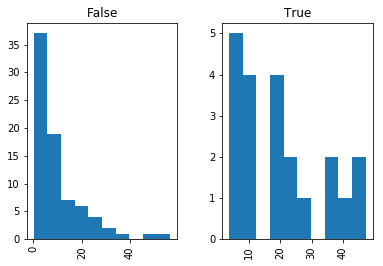

In [56]:
df[['normalized_dollars_d', 'dem_won']].hist(column='normalized_dollars_d', by='dem_won')

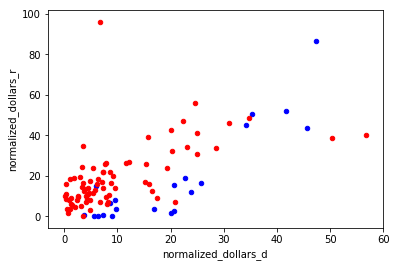

In [62]:
ax = df[df['dem_won'] == True].plot(kind='scatter', x='normalized_dollars_d', y='normalized_dollars_r', color='blue')
df[df['dem_won'] == False].plot(kind='scatter', x='normalized_dollars_d', y='normalized_dollars_r', color='red', ax=ax)

In [55]:
v.run_model(df, ['incumbents_r', 'incumbents_d', 'normalized_dollars_d','normalized_dollars_r', 'total_votes'], 'dem_won')


model formula to run
dem_won ~ incumbents_r + incumbents_d + normalized_dollars_d + normalized_dollars_r + total_votes

data points: 99
mean outcome: 0.2121
accuracy of always predicting a loss
0.787878787879

simple logistic regression:
coeffs:
                      0                     1
0             Intercept   [-0.00426098851951]
1          incumbents_r     [-0.431279572005]
2          incumbents_d      [0.435854337389]
3  normalized_dollars_d      [0.111969306941]
4  normalized_dollars_r    [-0.0589877342244]
5           total_votes  [-9.31203658484e-05]
accuracy
0.868686868687
AUC
0.945054945055

results of cross validation
[ 0.85  0.85  0.85  0.75  0.85  0.8   0.9   0.85  0.85  0.85]
0.84


In [67]:
v.run_model(df, ['incumbents_r', 'incumbents_d', 'normalized_dollar_ratio', 'total_votes'], 'dem_won')


model formula to run
dem_won ~ incumbents_r + incumbents_d + normalized_dollar_ratio + total_votes

data points: 99
mean outcome: 0.2121
accuracy of always predicting a loss
0.787878787879

simple logistic regression:
coeffs:
                         0                     1
0                Intercept    [0.00121327467043]
1             incumbents_r     [-0.438828018408]
2             incumbents_d      [0.470148611462]
3  normalized_dollar_ratio       [0.16265602693]
4              total_votes  [-8.91587090098e-05]
accuracy
0.89898989899
AUC
0.919413919414

results of cross validation
[ 0.95  0.85  0.85  0.9   0.9   0.9   0.9   0.9   0.95  0.85]
0.895


In [36]:
v.run_model(df_x, feature_columns, 'dem_won')



model formula to run
dem_won ~ incumbents_d + incumbents_r + total_votes + votes_r_prior1 + dollars_r_prior1 + votes_d_prior1 + dollars_d_prior1 + dem_won_prior1

data points: 37
mean outcome: 0.2432
accuracy of always predicting a loss
0.756756756757

simple logistic regression:
coeffs:
                        0                     1
0               Intercept  [-4.73392847936e-07]
1  dem_won_prior1[T.True]   [2.04400376561e-07]
2            incumbents_d   [2.12943780788e-06]
3            incumbents_r  [-1.28200808095e-05]
4             total_votes   [3.37367618086e-05]
5          votes_r_prior1   [-0.00157688037549]
6        dollars_r_prior1   [5.66147095417e-07]
7          votes_d_prior1    [0.00122876784398]
8        dollars_d_prior1   [5.88322921298e-06]
accuracy
0.891891891892
AUC
0.952380952381

results of cross validation
[ 0.75   0.5    0.875  0.875  0.625  0.75   0.875  0.875  0.875  0.875]
0.7875
